## Border

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
X = np.random.rand(5,20,20,3)
data_size = 2

In [10]:
zt = np.zeros([1,*X.shape[1:data_size+1], 1])
for i in range(data_size):
    axis = i + 1
    slc = [slice(None)] * len(X.shape)
    slc[axis] = slice(0,X.shape[1+i], X.shape[1+i]-1)
    zt[slc] = 1
# X*zt

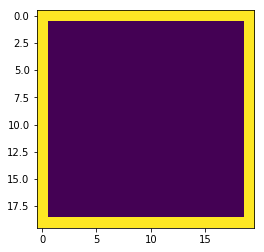

In [11]:
plt.imshow(zt[0,:,:,0])

## Clip

In [1]:
import numpy as np

In [2]:
nsamples = 10
nlatent = 100

In [3]:
def clip_dist1(nsamples, nlatent, m=3):
    z = np.random.randn(nsamples, nlatent)
    return np.clip(z,-m,m)

In [4]:
d1 = clip_dist1(nsamples, nlatent)
np.max(d1), np.min(d1)

(3.0, -3.0)

In [5]:
def clip_dist2(nsamples, nlatent, m=2.5):
    shape = [nsamples, nlatent]
    z = np.random.randn(*shape)
    support = np.logical_or(z<-m, z>m)
    while np.sum(support):
        z[support] = np.random.randn(*shape)[support]
        support = np.logical_or(z<-m, z>m)
    return z

In [6]:
d2 = clip_dist2(nsamples, nlatent)
np.max(d2), np.min(d2)

(2.4681265734208053, -2.476297407504818)

## Hinge loss

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.arange(-10,10,0.01)

In [47]:
def real(x):
    return -np.min(np.vstack([np.zeros(x.shape),-1+x]), axis=0)
def fake(x):
    return -np.min(np.vstack([np.zeros(x.shape),-1-x]), axis=0)
def relu(x):
    return np.maximum(x, 0)
def new_real(x):
    return relu(-x+1)
def new_fake(x):
    return relu(x+1)

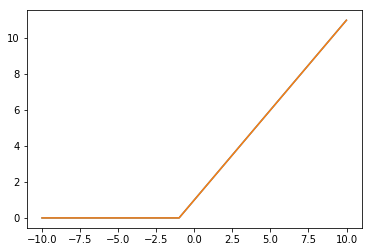

In [48]:
plt.plot(x,fake(x), x, new_fake(x))

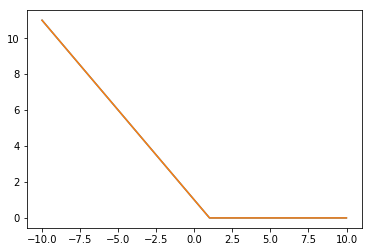

In [38]:
plt.plot(x,real(x), x, new_real(x))

In [15]:
x.shape

(2000,)